In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [2]:
ts_data=pd.read_csv("C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\data\\GUIDE_Test.csv", low_memory=False)

In [4]:
tr_data=pd.read_csv("C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\data\\new_train_sample.csv", low_memory=False)

In [12]:
ts_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [5]:
tr_data

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [6]:
tr_data.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [76]:
ts_data.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [15]:
ts_data.shape

(4147992, 46)

In [16]:
tr_data.shape

(4758418, 46)

In [17]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [8]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [77]:
ts_data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [10]:
tr_data.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [78]:
ts_data = ts_data.drop(ts_data.columns[0], axis=1)

In [20]:

tr_data = tr_data.drop(tr_data.columns[0], axis=1)

In [79]:
ts_data

,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,NaN,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,NaN,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,NaN,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,NaN,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [22]:
tr_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [80]:
list(ts_data)

['OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [ ]:
list(tr_data)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [81]:
missing_percentage_ts =(ts_data.isnull().sum()/(len(ts_data)))*100

In [25]:


missing_percentage =(tr_data.isnull().sum()/(len(tr_data)))*100

In [82]:
print(missing_percentage_ts)

OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       55.619779
IncidentGrade          0.000000
ActionGrouped         99.953881
ActionGranular        99.953881
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.994526
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFamily          99.243538
FileName

In [26]:
print(missing_percentage)

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.987542
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [84]:
threshold_ts= 50  # percentage
columns_to_drop_ts= missing_percentage_ts[missing_percentage_ts >50].index
print("Columns to drop:", columns_to_drop_ts)


Columns to drop: Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [27]:
threshold = 50  # percentage
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print("Columns to drop:", columns_to_drop)


Columns to drop: Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [85]:
ts_data = ts_data.drop(columns=columns_to_drop_ts,axis=1)

In [ ]:
tr_data = tr_data.drop(columns=columns_to_drop,axis=1)

In [86]:
ts_data.shape

(4147992, 35)

In [34]:
tr_data.shape

(4758418, 35)

In [87]:
ts_data.duplicated().sum()

np.int64(225297)

In [35]:
tr_data.duplicated().sum()

np.int64(156194)

In [88]:
ts_data.drop_duplicates(inplace=True)

In [36]:
tr_data.drop_duplicates(inplace=True)

In [89]:
print(ts_data.duplicated().sum())

0


In [37]:
print(tr_data.duplicated().sum())

0


In [91]:
ts_data

,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,Private
1,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,881,289573,117668,3586,0,0,242,1445,10630,Public
2,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,...,881,14,22,3586,5,66,242,1445,10630,Public
3,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,881,289573,117668,3586,5,66,242,1445,10630,Public
4,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,391,638112,2024-06-03T20:24:41.000Z,135,7322,Malware,BenignPositive,Machine,Impacted,...,881,289573,117668,3586,0,0,242,1445,10630,Public
4147987,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,Public
4147988,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,BenignPositive,User,Impacted,...,881,289573,117668,3586,5,66,242,1445,10630,Private
4147989,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,FalsePositive,Ip,Related,...,881,289573,117668,3586,5,66,242,1445,10630,Public


In [90]:
ts_data.isnull().sum()

OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [38]:
tr_data.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         24824
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [92]:
ts_data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [ ]:
tr_data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive', nan],
      dtype=object)

In [40]:
tr_data["IncidentGrade"].fillna(tr_data["IncidentGrade"].mode()[0],inplace=True) 

In [41]:
tr_data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [93]:

ts_data['Timestamp'] = pd.to_datetime(ts_data['Timestamp'])

In [ ]:

tr_data['Timestamp'] = pd.to_datetime(tr_data['Timestamp'])

In [94]:
ts_data['Day'] = ts_data['Timestamp'].dt.day
ts_data['Month'] =ts_data['Timestamp'].dt.month
ts_data['Hour'] = ts_data['Timestamp'].dt.hour
ts_data['Year'] = ts_data['Timestamp'].dt.year
ts_data["Time"]=ts_data["Timestamp"].dt.time

In [44]:
tr_data['Day'] = tr_data['Timestamp'].dt.day
tr_data['Month'] =tr_data['Timestamp'].dt.month
tr_data['Hour'] = tr_data['Timestamp'].dt.hour
tr_data['Year'] = tr_data['Timestamp'].dt.year
tr_data["Time"]=tr_data["Timestamp"].dt.time

In [ ]:
tr_data

In [95]:
ts_data.drop("Timestamp",axis=1,inplace=True) 

In [45]:

tr_data.drop("Timestamp",axis=1,inplace=True) 

In [96]:
ts_data.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,OSVersion,CountryCode,State,City,Usage,Day,Month,Hour,Year,Time
0,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,...,66,242,1445,10630,Private,4,6,22,2024,22:56:27
1,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,...,0,242,1445,10630,Public,3,6,12,2024,12:58:26
2,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,...,66,242,1445,10630,Public,8,6,3,2024,03:20:49
3,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,...,66,242,1445,10630,Public,12,6,12,2024,12:07:31
4,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,...,66,242,1445,10630,Public,6,6,17,2024,17:42:05


In [46]:
tr_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Hour,Year,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,...,5,66,242,1445,10630,6,6,5,2024,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,...,5,66,242,1445,10630,3,6,10,2024,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,...,5,66,242,1445,10630,13,6,3,2024,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,...,5,66,242,1445,10630,8,6,16,2024,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,...,5,66,242,1445,10630,9,6,2,2024,02:48:01


In [103]:
ts_data.isnull().sum()

OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
ApplicationId         0
OAuthApplicationId    0
ResourceIdName        0
OSFamily              0
CountryCode           0
Day                   0
Month                 0
Hour                  0
Year                  0
Time                  0
dtype: int64

In [52]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4602224 entries, 0 to 4758417
Data columns (total 39 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

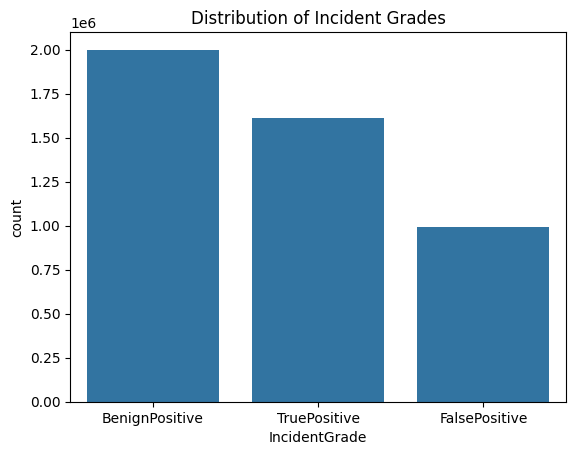

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IncidentGrade', data=tr_data)
plt.title('Distribution of Incident Grades')
plt.show()

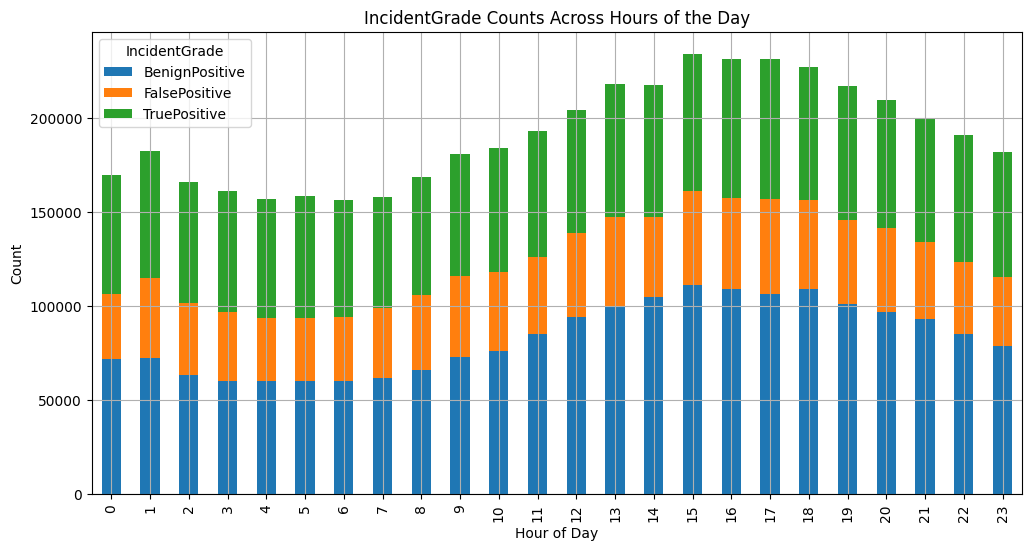

In [64]:
# Aggregate data
hour_incident_grade = tr_data.groupby(['Hour', 'IncidentGrade']).size().unstack()

# Plot
hour_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

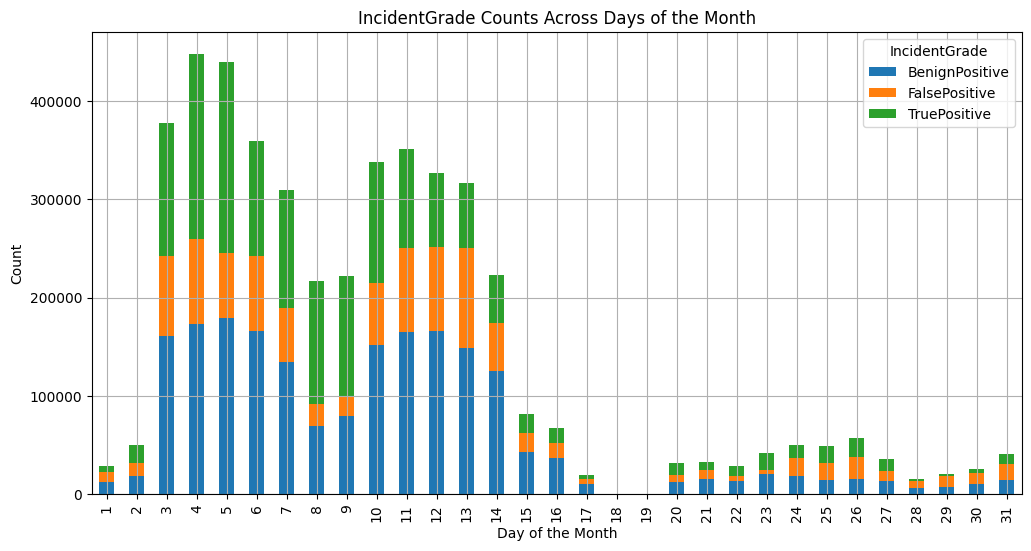

In [65]:
day_incident_grade = tr_data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

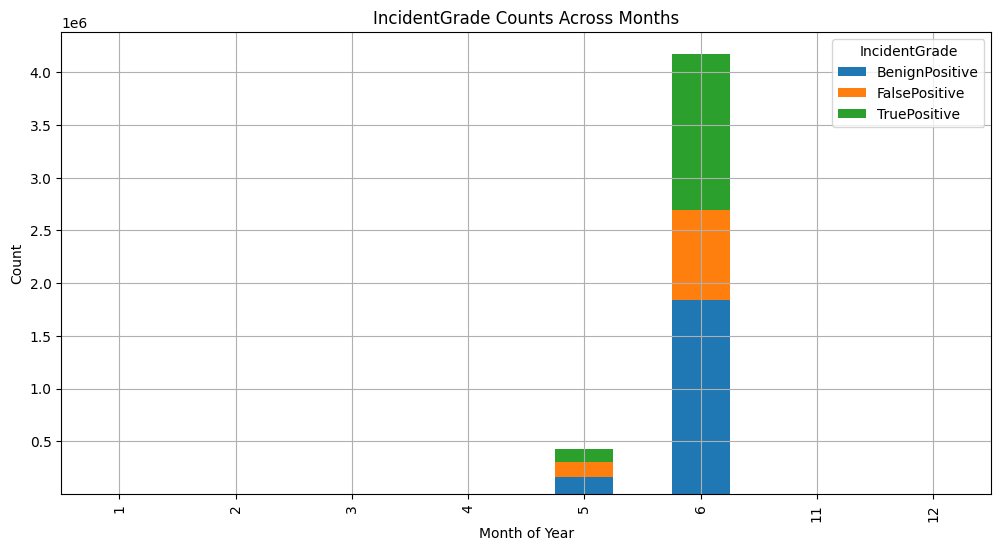

In [66]:

month_incident_grade = tr_data.groupby(['Month', 'IncidentGrade']).size().unstack()


month_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Months')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

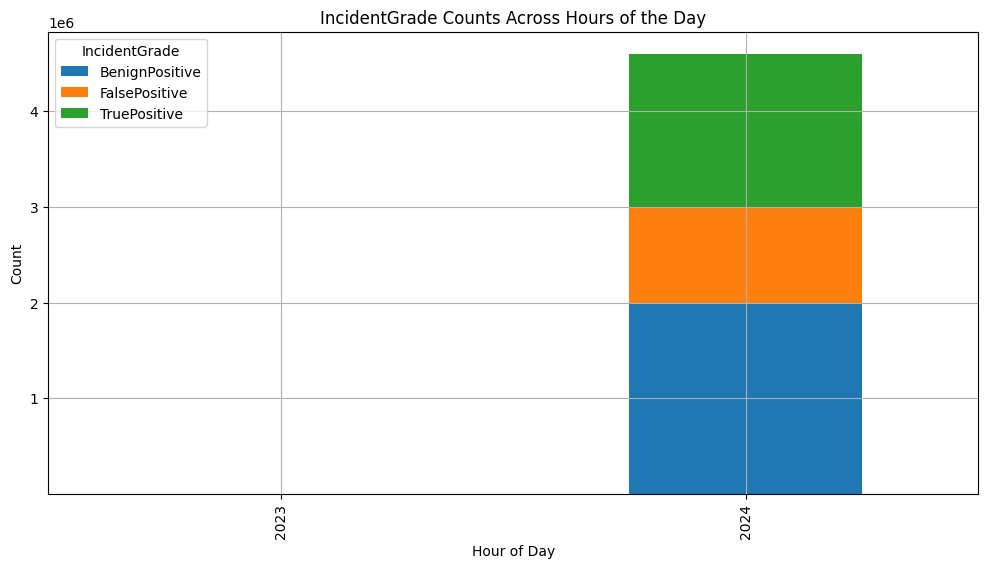

In [67]:
hour_incident_grade = tr_data.groupby(['Year', 'IncidentGrade']).size().unstack()

# Plot
hour_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

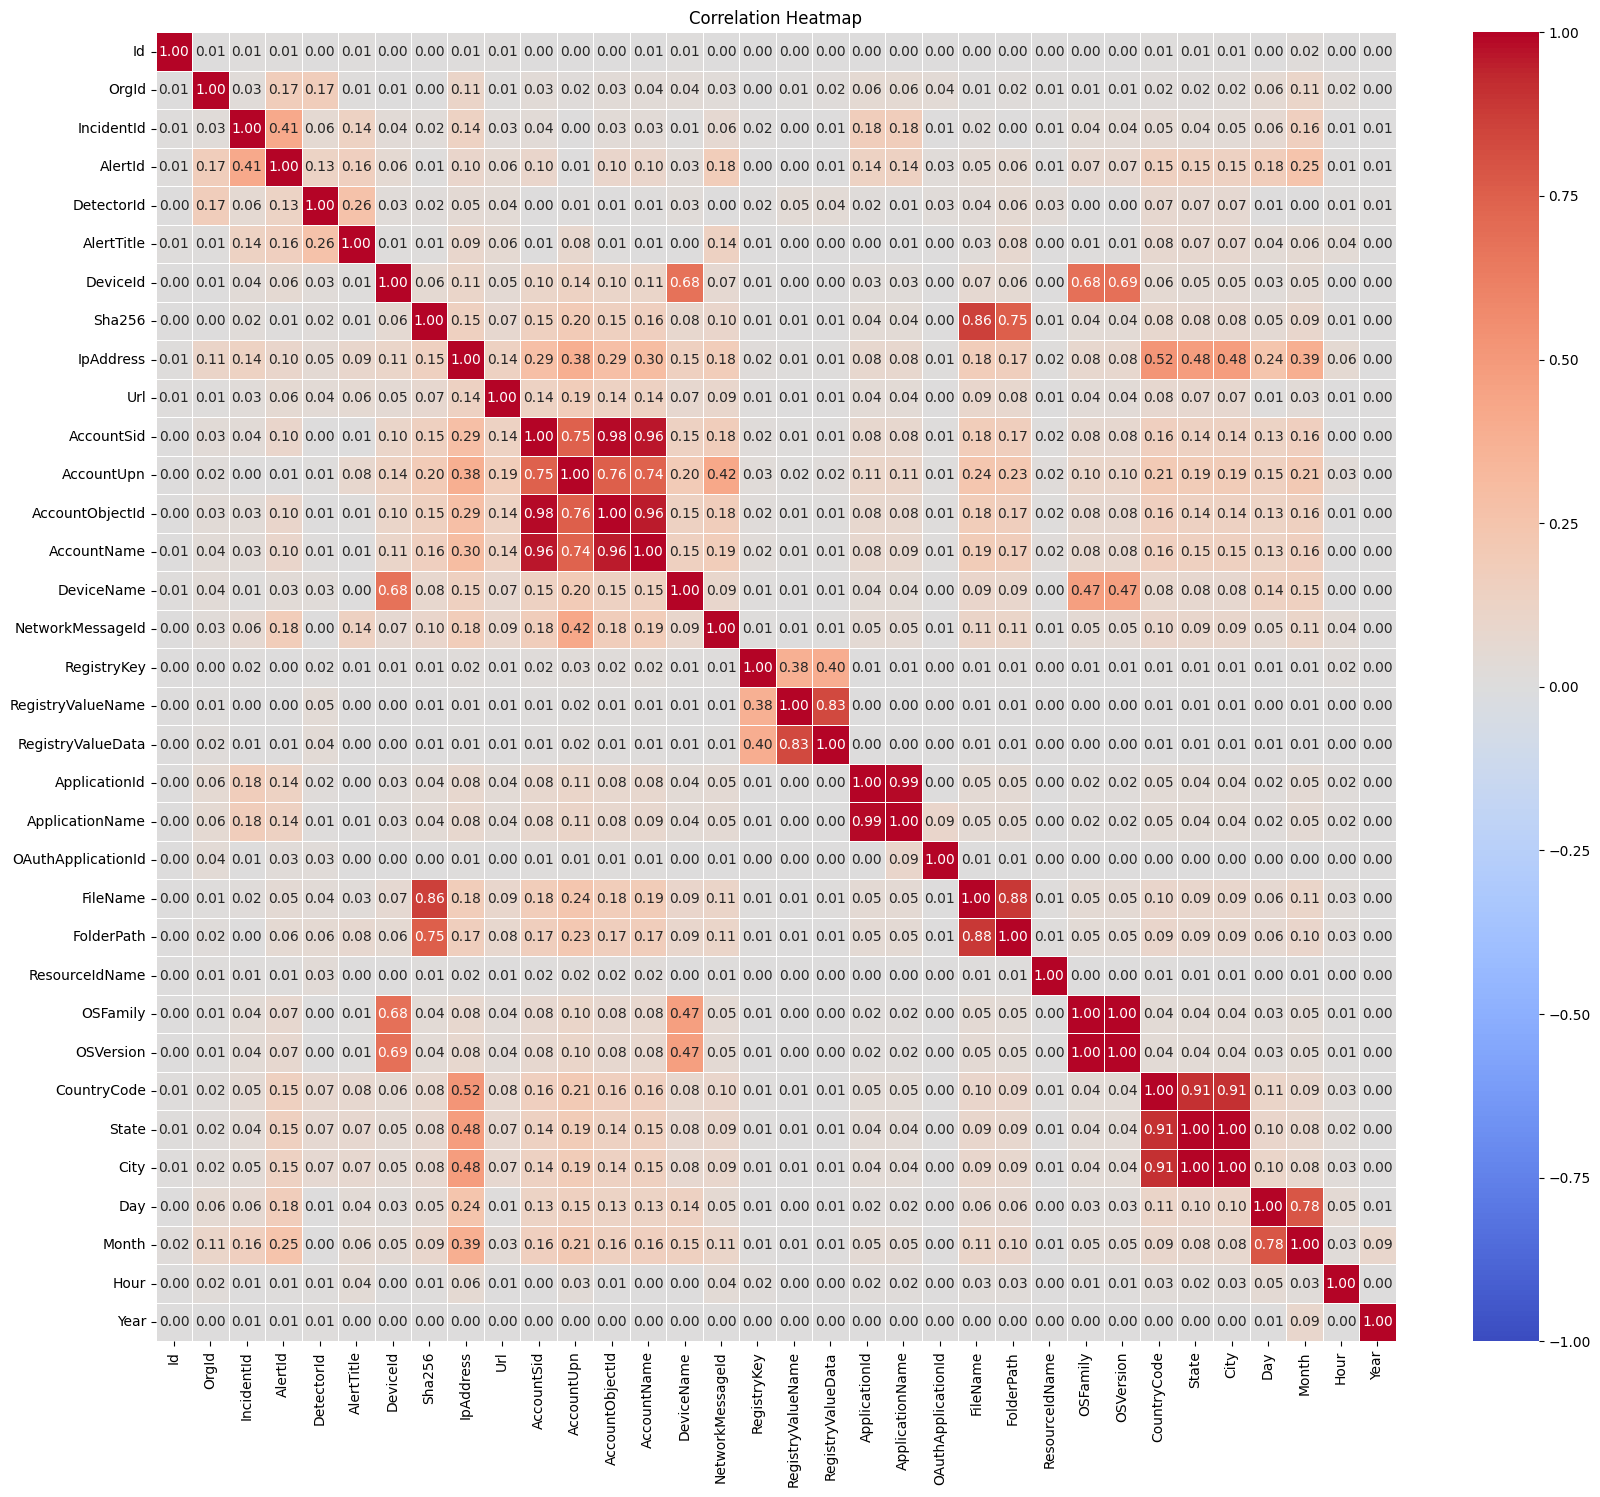

In [68]:
# Select numerical columns
numerical_df = tr_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [69]:
import numpy as np

In [70]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y]) 
                    for x, y in zip(*high_corr_var) 
                    if x != y and x < y]

# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    columns_to_remove.add(col2)  # or col1, based on your strategy

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = tr_data.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
print(df_cleaned_corr.head())

Columns removed: ['AccountName', 'State', 'ApplicationName', 'AccountObjectId', 'RegistryValueData', 'FolderPath', 'City', 'OSVersion', 'FileName']
              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1709396985476     26       18583   687462          31         813   
1   927712939180     33        5065     3990          38          25   
2  1090921697002    201      150787   807590         419         444   
3  1434519079555    204      108287    28575          44        1233   
4  1005022347708     54      528202  1458226         102       58829   

             Category   IncidentGrade EntityType EvidenceRole  ...  \
0             Malware  BenignPositive       File      Related  ...   
1              Impact  BenignPositive    Machine     Impacted  ...   
2           Execution  BenignPositive    Machine     Impacted  ...   
3  SuspiciousActivity    TruePositive       File      Related  ...   
4        Exfiltration  BenignPositive       File     Impacted  ...   

In [71]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr

categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr)

                    Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0        1709396985476     26       18583   687462          31         813   
1         927712939180     33        5065     3990          38          25   
2        1090921697002    201      150787   807590         419         444   
3        1434519079555    204      108287    28575          44        1233   
4        1005022347708     54      528202  1458226         102       58829   
...                ...    ...         ...      ...         ...         ...   
4758413   103079215470    142       93987    15739         112        7836   
4758414  1683627184337     36        1001   257479           2           2   
4758415  1597727836318    851       31194  1518250           1           1   
4758416   137438957239     12        2419     1203          16        1334   
4758417  1228360650489    201       39946   590317           5          97   

         Category  IncidentGrade  EntityType  EvidenceRole  ...

In [73]:
for column, le in label_encoders.items():
    joblib.dump(le, f'C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\{column}_label_encoder.pkl')

In [74]:
df_cleaned_corr.to_csv('train_data_processed.csv', index=False)

In [102]:

df_cleaned_corr

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year,Time
0,1709396985476,26,18583,687462,31,813,12,0,9,1,...,2251,881,3586,5,242,6,6,5,2024,21407
1,927712939180,33,5065,3990,38,25,9,0,17,0,...,2251,881,3586,5,242,3,6,10,2024,38709
2,1090921697002,201,150787,807590,419,444,6,0,17,0,...,2251,881,3586,5,242,13,6,3,2024,13000
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,...,2251,881,3586,5,242,8,6,16,2024,60897
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,...,2251,881,3586,5,242,9,6,2,2024,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,7,1,19,0,...,2251,881,3586,5,242,10,6,10,2024,37517
4758414,1683627184337,36,1001,257479,2,2,1,1,30,0,...,2251,881,3586,5,242,11,6,19,2024,70252
4758415,1597727836318,851,31194,1518250,1,1,10,0,19,1,...,2251,881,3586,5,242,9,6,4,2024,16061
4758416,137438957239,12,2419,1203,16,1334,9,0,13,1,...,2251,881,3586,5,242,21,5,23,2024,82871


In [97]:
ts_data.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)

In [98]:
ts_data.drop('Usage',axis=1,inplace=True)

In [99]:

ts_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 29 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   OrgId               int64 
 1   IncidentId          int64 
 2   AlertId             int64 
 3   DetectorId          int64 
 4   AlertTitle          int64 
 5   Category            object
 6   IncidentGrade       object
 7   EntityType          object
 8   EvidenceRole        object
 9   DeviceId            int64 
 10  Sha256              int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountSid          int64 
 14  AccountUpn          int64 
 15  DeviceName          int64 
 16  NetworkMessageId    int64 
 17  RegistryKey         int64 
 18  RegistryValueName   int64 
 19  ApplicationId       int64 
 20  OAuthApplicationId  int64 
 21  ResourceIdName      int64 
 22  OSFamily            int64 
 23  CountryCode         int64 
 24  Day                 int32 
 25  Month               int

In [104]:
ts_data = ts_data[['OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
ts_data.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,...,1631,635,2251,881,3586,5,242,4,6,22
1,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,...,1631,635,2251,881,3586,0,242,3,6,12
2,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,...,1631,635,2251,881,3586,5,242,8,6,3
3,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,...,1631,635,2251,881,3586,5,242,12,6,12
4,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,...,1631,635,2251,881,3586,5,242,6,6,17


In [ ]:
loaded_label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'] 
for column in categorical_cols:
    loaded_label_encoders[column] = joblib.load(f'C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\{column}_label_encoder.pkl')


In [ ]:

# Apply label encoding to categorical features
for column, le in loaded_label_encoders.items():
    if column in ts_data.columns:
      ts_data[column] = le.transform(ts_data[column])

In [108]:
ts_data

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,657,11767,87199,524,563,11,0,30,0,98799,...,1631,635,2251,881,3586,5,242,4,6,22
1,3,91158,632273,2,2,1,0,17,0,1239,...,1631,635,2251,881,3586,0,242,3,6,12
2,145,32247,131719,2932,10807,11,0,25,1,98799,...,1631,635,2251,881,3586,5,242,8,6,3
3,222,15294,917686,0,0,10,1,7,1,98799,...,1631,635,2251,881,3586,5,242,12,6,12
4,363,7615,5944,27,18,5,0,30,0,98799,...,1631,635,2251,881,3586,5,242,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,391,638112,135,7322,12,0,17,0,4,...,1631,635,2251,881,3586,0,242,3,6,20
4147987,262,3017,227156,139,120,10,0,30,0,98799,...,1631,635,2251,881,3586,5,242,4,6,3
4147988,1323,31001,304819,219,196,10,0,30,0,98799,...,1631,635,2251,881,3586,5,242,4,6,19
4147989,47,3653,7243,57,29,1,1,13,1,98799,...,1631,635,2251,881,3586,5,242,15,6,0


In [109]:

ts_data.to_csv('test_data_processed.csv', index=False)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\train_data_processed.csv")
df_test = pd.read_csv("C:\\Users\\SABA ANBU\\OneDrive\\Desktop\\project4\\test_data_processed.csv")

In [4]:
#Splitting data
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Selecting top features using anova 
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day'],
      dtype='object')


In [6]:
X_new=X[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
X_new

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,AccountSid,DeviceName,NetworkMessageId,CountryCode,Day
0,26,18583,687462,31,813,12,9,1,1296,360606,441377,153085,529644,242,6
1,33,5065,3990,38,25,9,17,0,138268,360606,441377,3142,529644,242,3
2,201,150787,807590,419,444,6,17,0,138268,360606,441377,4181,529644,242,13
3,204,108287,28575,44,1233,16,9,1,138268,360606,441377,153085,529644,242,8
4,54,528202,1458226,102,58829,7,9,0,138268,360606,441377,153085,529644,242,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602219,142,93987,15739,112,7836,7,19,0,138268,360606,441377,153085,869,242,10
4602220,36,1001,257479,2,2,1,30,0,138268,360606,32117,153085,529644,242,11
4602221,851,31194,1518250,1,1,10,19,1,138268,360606,441377,153085,402271,242,9
4602222,12,2419,1203,16,1334,9,13,1,138268,546,441377,153085,529644,242,21


In [7]:
#Training train data with selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [8]:
# Output the shapes of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)

Training set shape: (3681779, 15)
Validation set shape: (920445, 15)



Evaluating Baseline Model...
Accuracy: 0.3576335359527185
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43    399779
           1       0.22      0.22      0.22    199133
           2       0.35      0.35      0.35    321533

    accuracy                           0.36    920445
   macro avg       0.33      0.33      0.33    920445
weighted avg       0.36      0.36      0.36    920445



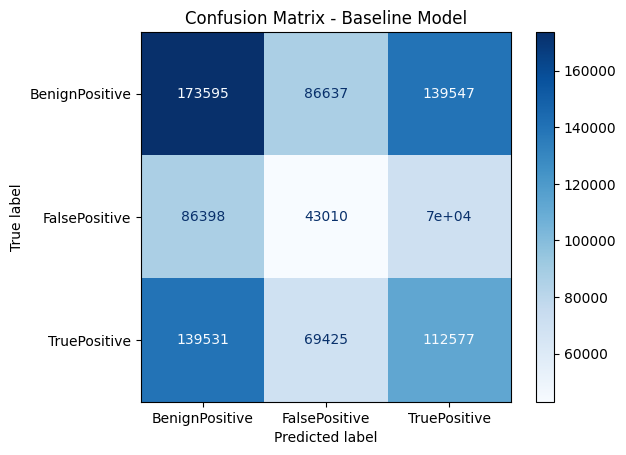

In [9]:
# Baseline model with stratified strategy
model_baseline = DummyClassifier(strategy='stratified', random_state=42)

# BASELINE MODEL
print(f"\nEvaluating Baseline Model...")

# Fit the model
model_baseline.fit(X_train, y_train)

# Predict on test data
y_pred_baseline = model_baseline.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0)) 

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Baseline Model')
plt.show()


Evaluating RandomForest...
Accuracy: 0.9777118676292446
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    399779
           1       0.97      0.96      0.97    199133
           2       0.99      0.98      0.98    321533

    accuracy                           0.98    920445
   macro avg       0.98      0.97      0.98    920445
weighted avg       0.98      0.98      0.98    920445



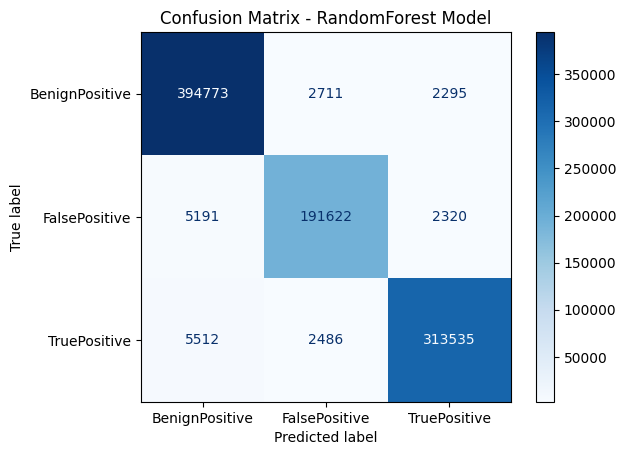

In [10]:
# Initialize the models
model_rf = RandomForestClassifier(random_state=42)

#RANDOM FOREST
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest Model')
plt.show()


Evaluating XGBoost...
Accuracy: 0.9187034532209963
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    399779
           1       0.93      0.85      0.89    199133
           2       0.95      0.91      0.93    321533

    accuracy                           0.92    920445
   macro avg       0.92      0.91      0.91    920445
weighted avg       0.92      0.92      0.92    920445



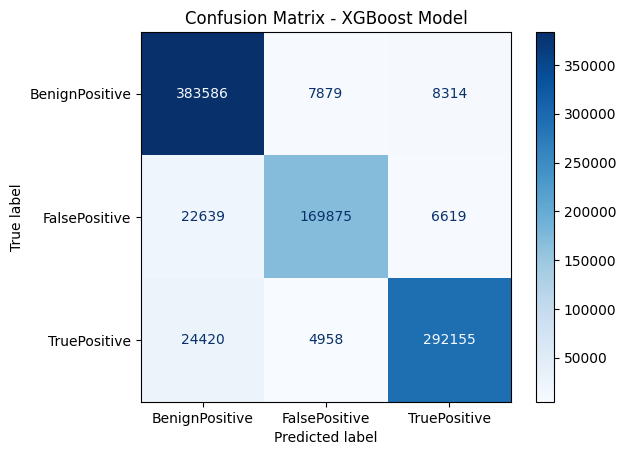

In [11]:
model_xgb = XGBClassifier(random_state=42)

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model 
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()


Evaluating LGBoost...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.258221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 3681779, number of used features: 15
[LightGBM] [Info] Start training from score -0.834025
[LightGBM] [Info] Start training from score -1.532348
[LightGBM] [Info] Start training from score -1.050753
Accuracy: 0.8977483717115091
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    399779
           1       0.93      0.80      0.86    199133
           2       0.95      0.88      0.91    321533

    accuracy                           0.90    920445
   macro avg       0.91      0.88      0.89    920445
weighted avg       0.90      0.90      0.90    920445



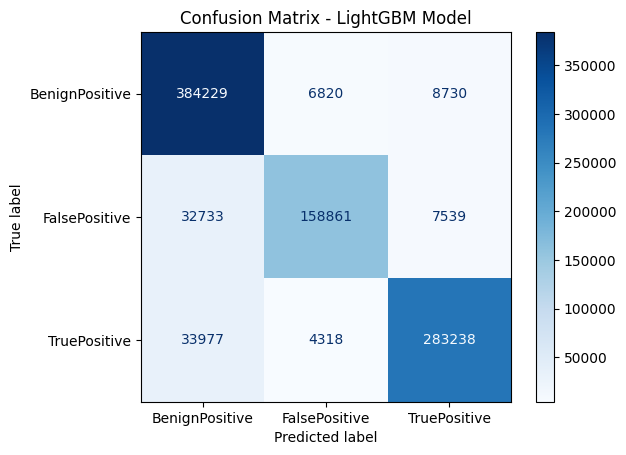

In [12]:
model_lgb = LGBMClassifier(random_state = 42)

#LGBoost
print(f"\nEvaluating LGBoost...")

# Fit the model
model_lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = model_lgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()

In [13]:
import joblib

# Save the trained RandomForest model to a file
joblib.dump(model_rf, 'C:/Users/SABA ANBU/OneDrive/Desktop/project4/random_forest_model.pkl')

['C:/Users/SABA ANBU/OneDrive/Desktop/project4/random_forest_model.pkl']

In [14]:
# Error Analysis
errors = (y_test != y_pred_baseline)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_baseline[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
1628848     0          1
4044410     2          0
1680564     1          0
4202143     0          2
2914690     0          1
...       ...        ...
576929      2          0
527828      2          0
4101963     0          1
4363972     2          0
3002680     2          0

[591263 rows x 2 columns]


In [15]:
# Error Analysis
errors = (y_test != y_pred_rf)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_rf[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
543005      0          1
604265      2          0
111184      0          1
2306091     0          1
1255276     1          2
...       ...        ...
4368186     0          2
3108338     0          1
1164962     1          2
3900661     1          0
3169512     2          1

[20515 rows x 2 columns]


In [16]:
# Error Analysis
errors = (y_test != y_pred_lgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_lgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
1680564     1          0
2611505     1          2
4266018     1          0
439746      2          0
3365424     0          1
...       ...        ...
3926624     2          0
27912       2          0
1925785     2          0
527828      2          0
2492804     2          0

[94117 rows x 2 columns]


In [17]:
# Error Analysis
errors = (y_test != y_pred_xgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_xgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
2611505     1          2
664255      0          2
4266018     1          2
136110      0          1
3344882     1          0
...       ...        ...
1064197     2          0
3926624     2          0
1056293     2          1
1925785     2          1
527828      2          1

[74829 rows x 2 columns]


In [18]:
X2 = df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
y2= df_test['IncidentGrade']

In [19]:
import joblib

# Load the model
loaded_model_rf = joblib.load('C:/Users/SABA ANBU/OneDrive/Desktop/project4/random_forest_model.pkl')

# Check the model type
print(type(loaded_model_rf))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [20]:
y_pred_new = loaded_model_rf.predict(X2)

In [21]:
print("Accuracy:", accuracy_score(y2, y_pred_new))
print("Classification Report:")
print(classification_report(y2, y_pred_new))

Accuracy: 0.9336293033233529
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94   1630942
           1       0.91      0.90      0.90    868897
           2       0.96      0.94      0.95   1422856

    accuracy                           0.93   3922695
   macro avg       0.93      0.93      0.93   3922695
weighted avg       0.93      0.93      0.93   3922695



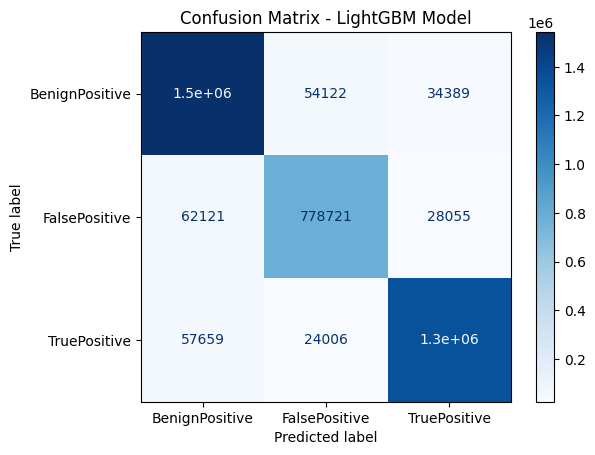

In [22]:
# Generate the confusion matrix
cm = confusion_matrix(y2, y_pred_new)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()